# Initialization of the prompt and the dataset

In [2]:
prompt = """You are a system that checks if a photo meets passport photo requirements.
Respond in exactly one of two ways:
- "Acceptable"
- "Unacceptable: <One ore more criteria>"

Criteria to consider: 
Format: Head size must be just right and be in the centre of the frame
Photo quality:  In sharp focus and clear. Neutral colour, natural skin tones, no red eyes.
Lighting: Appropriate brightness and contrast.  Balanced lighting, no shadows or flash reflections on face.
Eyes: Directly looking at the camera. Eyes open and clearly visible, no hair across the eyes.
Pose: Face must be in the centre. Portrait style and tilted positions are not acceptable. The photograph must show both sides of the face evenly
Background: Plain light-coloured (single-coloured) background. The photographed person must be shown alone with clear background
Glasses: Eyes must be showed clearly with no flash reflections on glasses.  No tinted glasses. Frames must not cover any part of the eyes.
Head coverings: Head coverings are not permitted except for religious reasons. Facial features from bottom of the chin to top of forehead and both sides of the face must be clearly shown.
Facial Expression: Facial expression must be neutral. Mouth must be closed.
"""


In [3]:
from src.LlavaNextFineTuned import LlavaNextFineTuned
from src.utils import Utils
import torch
import gc

photos_dataset = Utils.get_dataset_data("test")

2025-06-25 01:25:56.396574: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-25 01:25:56.408646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750807556.421285 3931893 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750807556.425163 3931893 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750807556.437025 3931893 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

A total of 30 photos were loaded as test dataset. Of which, 15 are acceptable and 15 are unacceptable


# Tests

## 1 epoch

### lr = 2e-5

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Classifying Photos: 100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


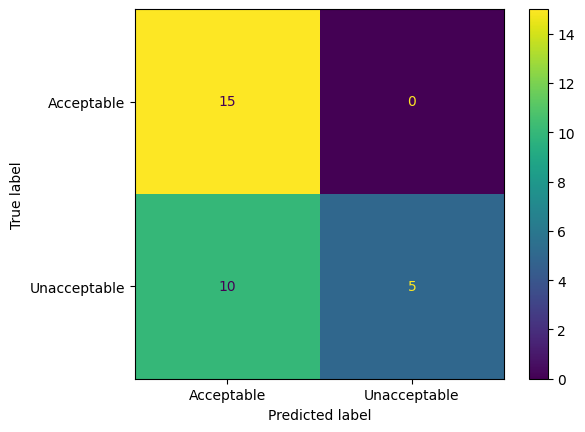

{'Accuracy': 0.6666666666666666, 'Precision': 0.6, 'Recall': 1.0, 'F1_score': 0.75}


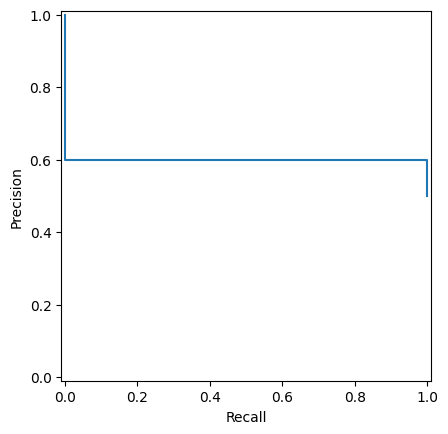

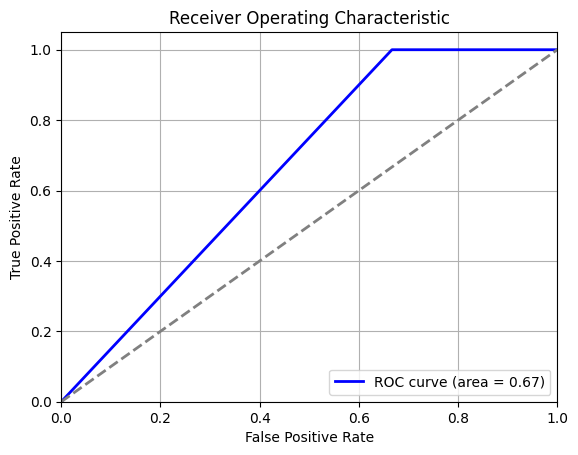

FP ./data/test/unacceptable/29.png Acceptable
FP ./data/test/unacceptable/30.png Acceptable
FP ./data/test/unacceptable/40.png Acceptable
FP ./data/test/unacceptable/58.png Acceptable
FP ./data/test/unacceptable/66.jpg Acceptable
FP ./data/test/unacceptable/83.png Acceptable
FP ./data/test/unacceptable/84.png Acceptable
FP ./data/test/unacceptable/106.png Acceptable
FP ./data/test/unacceptable/115.png Acceptable
FP ./data/test/unacceptable/116.png Acceptable


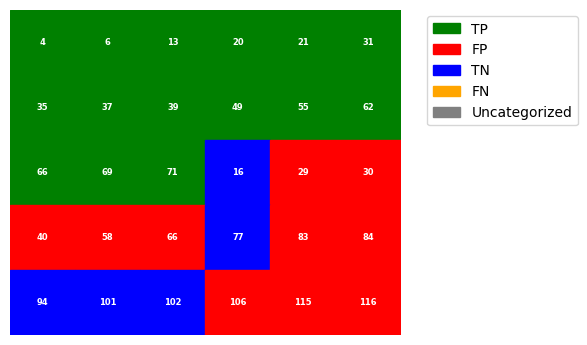

In [4]:
model = LlavaNextFineTuned("fine-tuned-weights/lr2e-5")
Utils.eval(model.evaluate, photos_dataset, prompt)

del model
gc.collect()
torch.cuda.empty_cache()

### lr = 9e-6

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Classifying Photos: 100%|██████████| 30/30 [02:06<00:00,  4.23s/it]


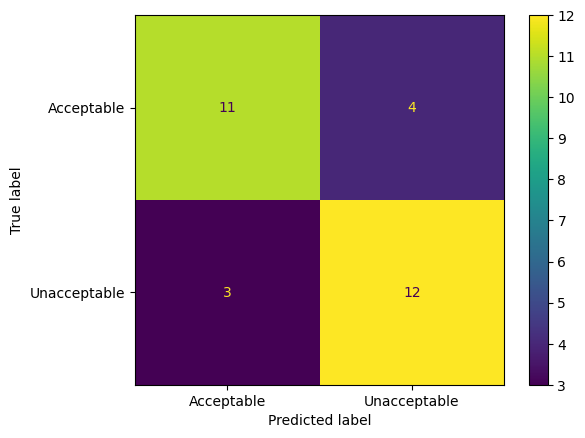

{'Accuracy': 0.7666666666666667, 'Precision': 0.7857142857142857, 'Recall': 0.7333333333333333, 'F1_score': 0.7586206896551724}


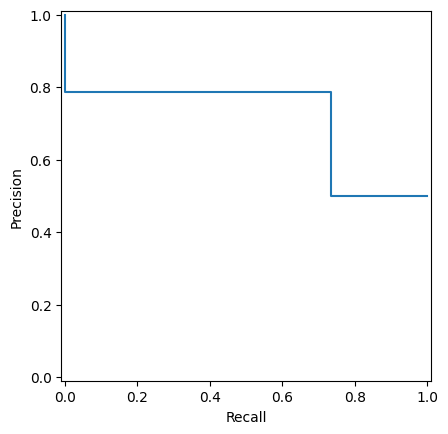

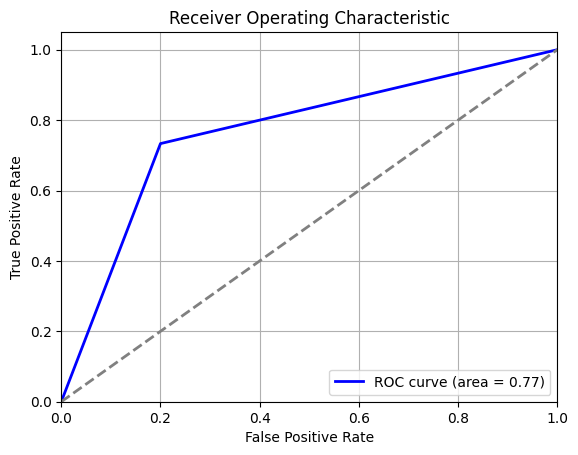

FN ./data/small-test/acceptable/13.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/20.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/21.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/62.png Unacceptable: Lighting
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable


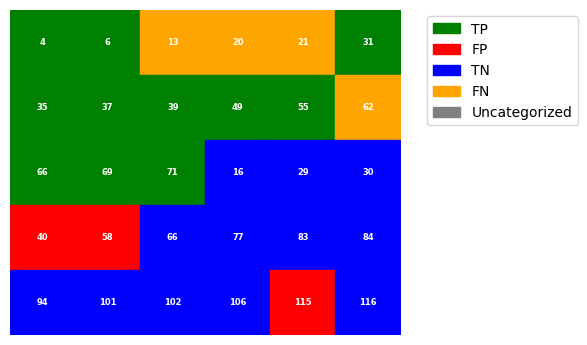

In [6]:
model = LlavaNextFineTuned("fine-tuned-weights/lr9e-6")
Utils.eval(model.evaluate, photos_dataset, prompt)

del model
gc.collect()
torch.cuda.empty_cache()

### lr = 7e-6

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Classifying Photos: 100%|██████████| 30/30 [01:47<00:00,  3.60s/it]


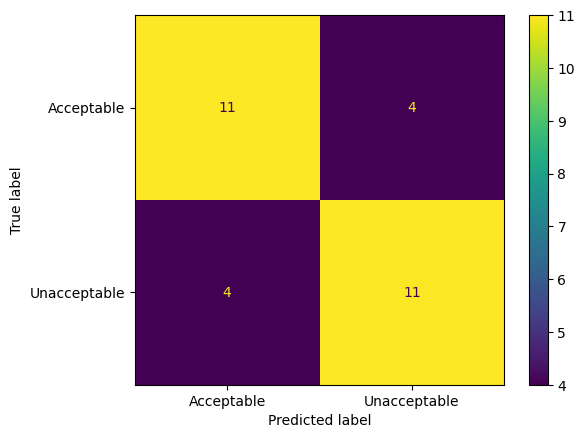

{'Accuracy': 0.7333333333333333, 'Precision': 0.7333333333333333, 'Recall': 0.7333333333333333, 'F1_score': 0.7333333333333333}


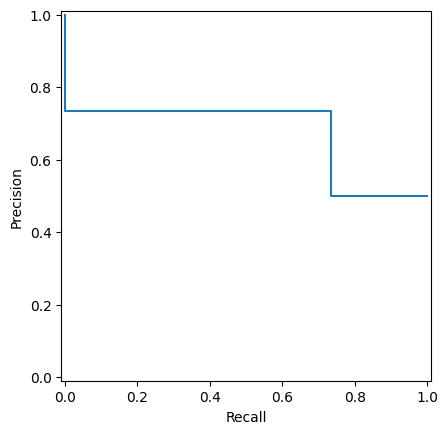

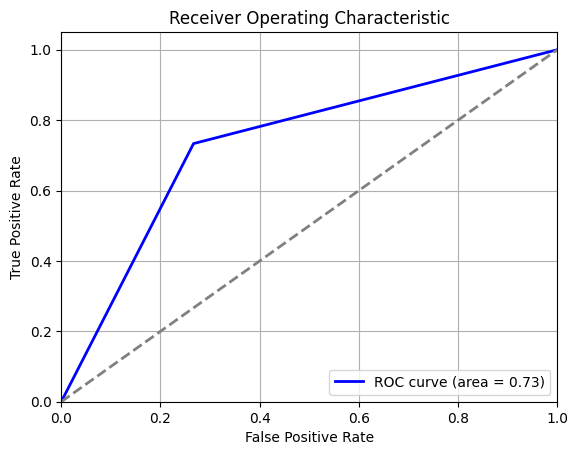

FN ./data/small-test/acceptable/13.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/20.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/21.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/62.png Unacceptable:
- Background: The background is not plain light-coloured. There are shadows on the background.
- Facial Expression: The facial expression is not neutral. The mouth is slightly open.
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable
FP ./data/small-test/unacceptable/116.png Acceptable


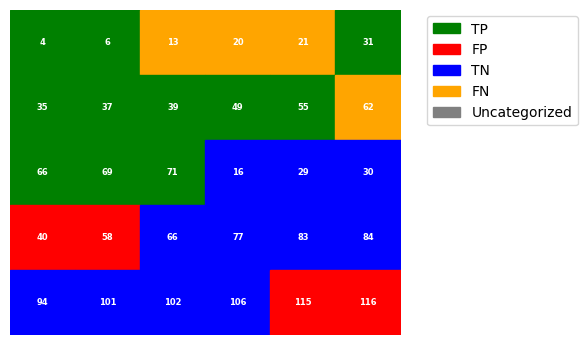

In [7]:
model = LlavaNextFineTuned("fine-tuned-weights/lr7e-6")
Utils.eval(model.evaluate, photos_dataset, prompt)

del model
gc.collect()
torch.cuda.empty_cache()

## 3 epochs

### lr = 1e-5

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Classifying Photos: 100%|██████████| 30/30 [00:33<00:00,  1.12s/it]


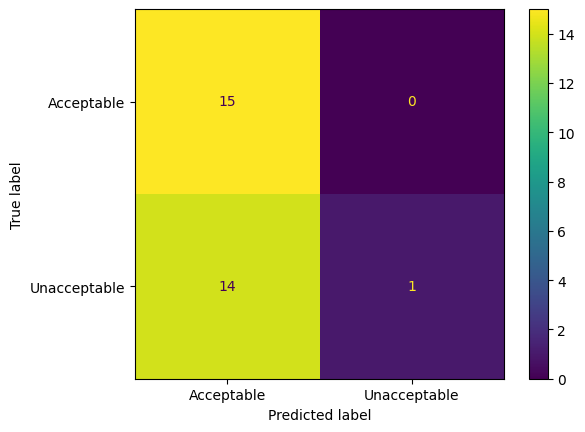

{'Accuracy': 0.5333333333333333, 'Precision': 0.5172413793103449, 'Recall': 1.0, 'F1_score': 0.6818181818181818}


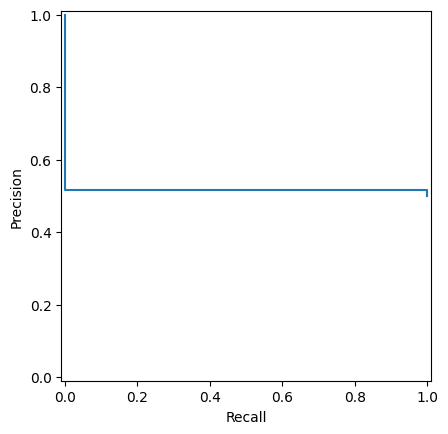

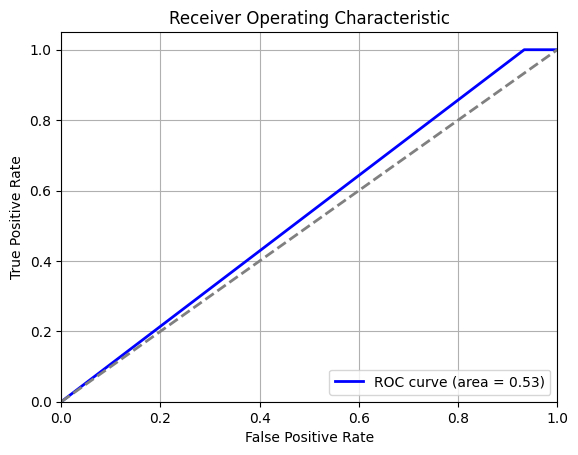

FP ./data/small-test/unacceptable/16.png Acceptable
FP ./data/small-test/unacceptable/29.png Acceptable
FP ./data/small-test/unacceptable/30.png Acceptable
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/66.jpg Acceptable
FP ./data/small-test/unacceptable/83.png Acceptable
FP ./data/small-test/unacceptable/84.png Acceptable
FP ./data/small-test/unacceptable/94.png Acceptable
FP ./data/small-test/unacceptable/101.png Acceptable
FP ./data/small-test/unacceptable/102.jpg Acceptable
FP ./data/small-test/unacceptable/106.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable
FP ./data/small-test/unacceptable/116.png Acceptable


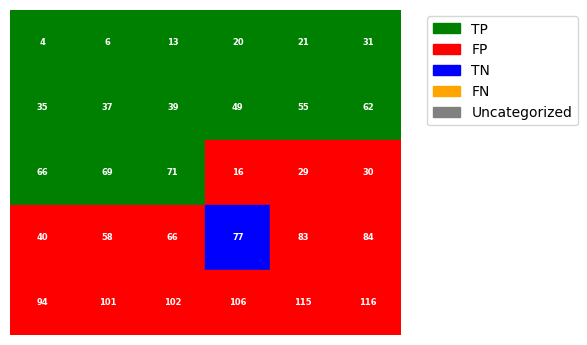

In [9]:
model = LlavaNextFineTuned("fine-tuned-weights/lr1e-5_3-epoch")
Utils.eval(model.evaluate, photos_dataset, prompt)

del model
gc.collect()
torch.cuda.empty_cache()

### lr = 5e-6

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Classifying Photos: 100%|██████████| 30/30 [00:46<00:00,  1.56s/it]


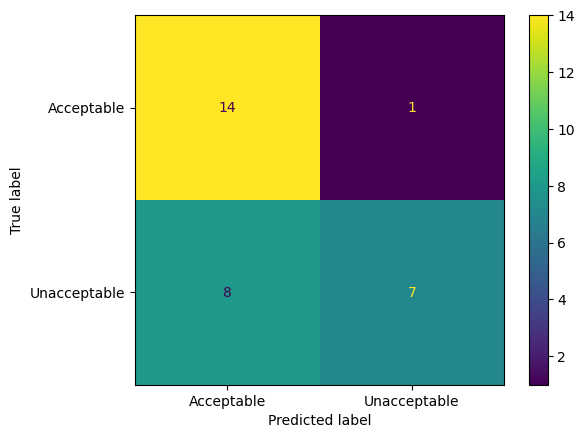

{'Accuracy': 0.7, 'Precision': 0.6363636363636364, 'Recall': 0.9333333333333333, 'F1_score': 0.7567567567567568}


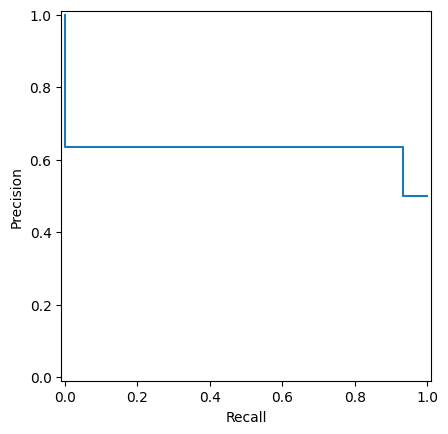

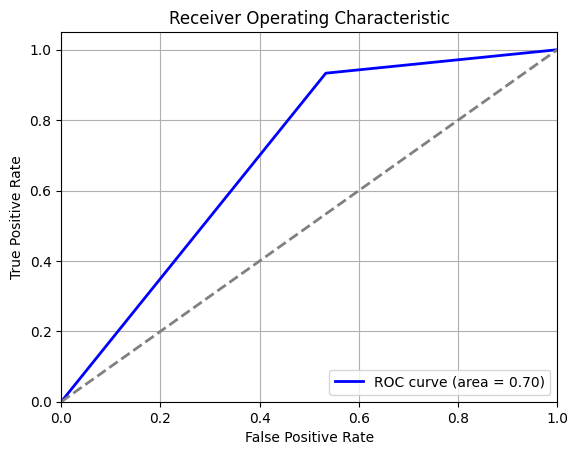

FN ./data/small-test/acceptable/62.png Unacceptable:
- Background: The background is not plain light-coloured. There are shadows on the background.
- Glasses: The person is wearing glasses, which are not allowed in passport photos.
FP ./data/small-test/unacceptable/29.png Acceptable
FP ./data/small-test/unacceptable/30.png Acceptable
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/83.png Acceptable
FP ./data/small-test/unacceptable/106.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable
FP ./data/small-test/unacceptable/116.png Acceptable


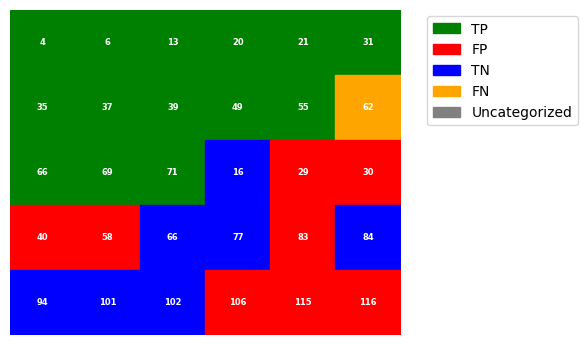

In [10]:
model = LlavaNextFineTuned("fine-tuned-weights/lr5e-6_3-epoch")
Utils.eval(model.evaluate, photos_dataset, prompt)

del model
gc.collect()
torch.cuda.empty_cache()

### lr = 2e-6

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Classifying Photos: 100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


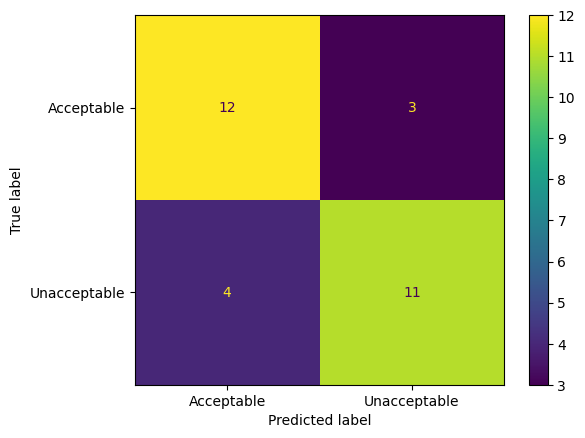

{'Accuracy': 0.7666666666666667, 'Precision': 0.75, 'Recall': 0.8, 'F1_score': 0.7741935483870968}


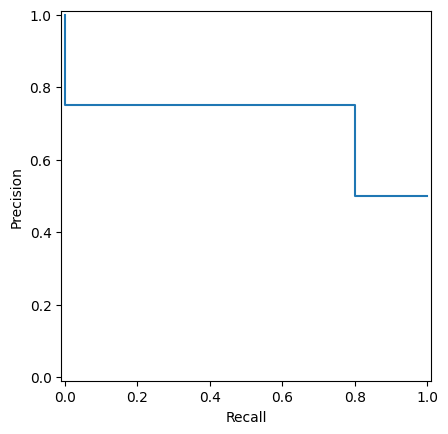

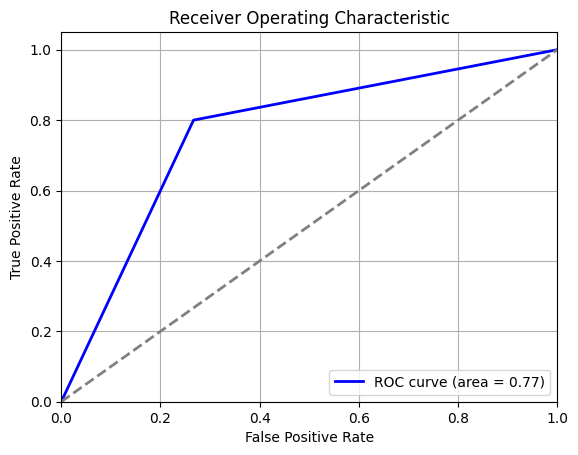

FN ./data/small-test/acceptable/13.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/21.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/62.png Unacceptable: Lighting
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable
FP ./data/small-test/unacceptable/116.png Acceptable


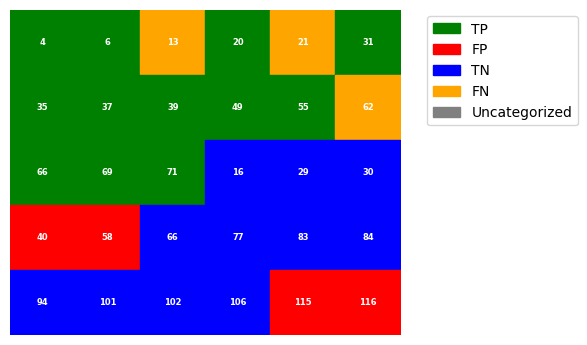

In [11]:
model = LlavaNextFineTuned("fine-tuned-weights/lr2e-6_3-epoch")
Utils.eval(model.evaluate, photos_dataset, prompt)

del model
gc.collect()
torch.cuda.empty_cache()

### lr = 1e-6

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Classifying Photos: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


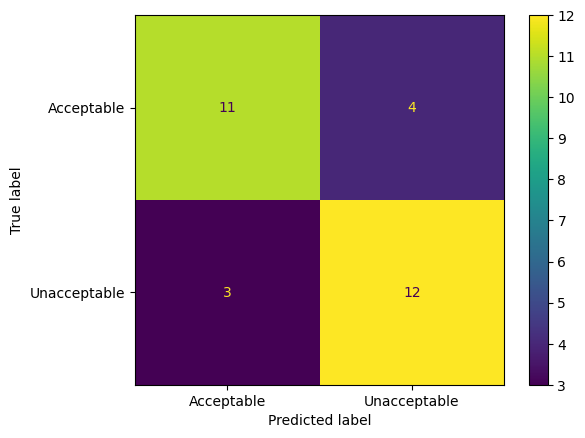

{'Accuracy': 0.7666666666666667, 'Precision': 0.7857142857142857, 'Recall': 0.7333333333333333, 'F1_score': 0.7586206896551724}


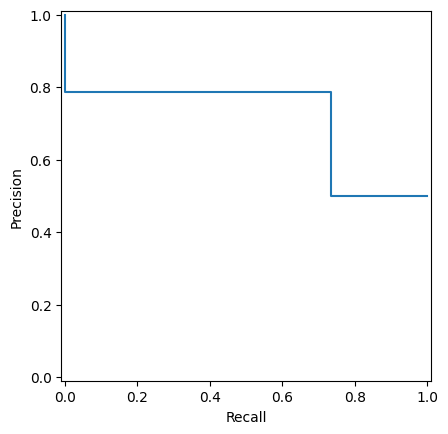

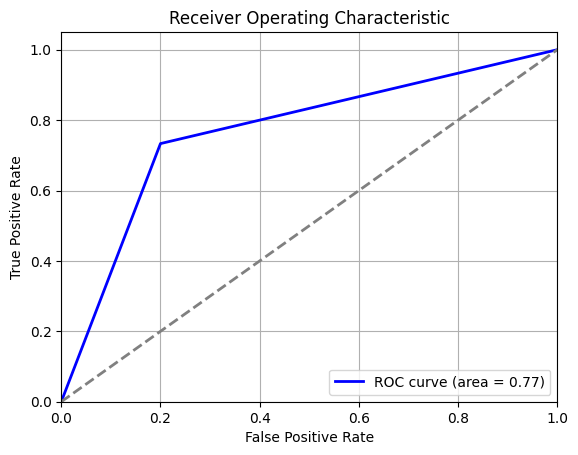

FN ./data/small-test/acceptable/13.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/20.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/21.png Unacceptable: Eyes are not directly looking at the camera.
FN ./data/small-test/acceptable/62.png Unacceptable: Lighting
FP ./data/small-test/unacceptable/40.png Acceptable
FP ./data/small-test/unacceptable/58.png Acceptable
FP ./data/small-test/unacceptable/115.png Acceptable


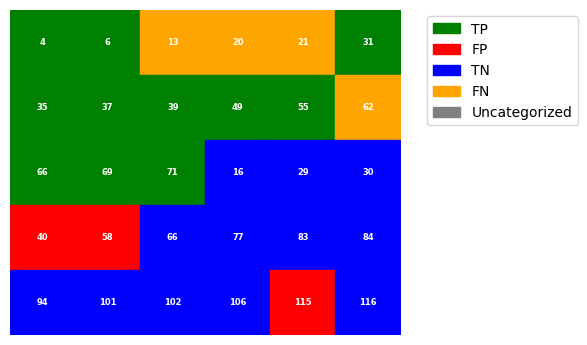

In [12]:
model = LlavaNextFineTuned("fine-tuned-weights/lr1e-6_3-epoch")
Utils.eval(model.evaluate, photos_dataset, prompt)

del model
gc.collect()
torch.cuda.empty_cache()